<a href="https://colab.research.google.com/github/smomtahe/Multi-class_Classification_SoftMax/blob/main/Softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
from sklearn.datasets import load_digits
digits = load_digits()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from google.colab import drive
from struct import unpack
import tensorflow as tf
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from matplotlib import animation
from matplotlib import rc
rc('animation', html='jshtml')
import matplotlib
matplotlib.use('Agg')
from mpl_toolkits.mplot3d import Axes3D
import math
!pip install celluloid
from celluloid import Camera
from IPython.display import HTML # display animation


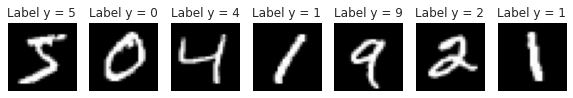

In [ ]:
#Loading mnist
from keras.datasets import mnist
# 85% train and 15%  test
(train_X, train_y), (test_X, test_y) = mnist.load_data()
fig = plt.figure(figsize=(10,10))
for i in range(7):
    ax = fig.add_subplot(1, 7, i+1)
    ax.imshow(train_X[i], cmap=plt.get_cmap('gray'))
    ax.set_title('Label y = {y}'.format(y=train_y[i]))
    plt.axis('off')

X_train = train_X.reshape(len(train_X),28*28)
X_test = test_X.reshape(len(test_X),28*28)

In [ ]:
#4 digits/classes
dx1=1
dx2=2
dx3=3
dx4=4
c=4
counter=0
train_i=np.where((train_y == dx1) | (train_y == dx2) | (train_y == dx3) | (train_y == dx4))[0]
test_i=np.where((test_y == dx1) | (test_y == dx2) | (test_y == dx3) | (test_y == dx4))[0]
new_X_train=X_train[train_i,:]
new_test_y=test_y[test_i]
new_test_x=train_X[train_i,:,:]
new_test_input=test_X[test_i,:]
new_test_x2=test_X[test_i,:,:]
new_train_label=train_y[train_i]
temp=new_train_label
label1=np.where(temp==dx1)[0]
label2=np.where(temp==dx2)[0]
label3=np.where(temp==dx3)[0]
label4=np.where(temp==dx4)[0]
new_train_label[label1]=0
new_train_label[label2]=1
new_train_label[label3]=2
new_train_label[label4]=3

In [ ]:
def one_label(y, cl): # cl=4 is number of classes
    # zero matrix of size (m, 4) and put 1 for label
    new_label = np.zeros((len(y), cl))
    new_label[np.arange(len(y)), y] = 1
    return new_label

def softmax(z):
    exp = np.exp(z - np.max(z))
    # Calculating softmax for all examples.
    for i in range(len(z)):
        exp[i] /= np.sum(exp[i])
    return exp

def fit(X, y, alpha, cl, epochs, batch_size):
    #m and n are number of training examples and features respecitively
    m, n = X.shape
    w = np.random.random((n, cl))
    b = np.random.random(cl)
    # Empty list to store losses and weights.
    losses = []
    weights=[]
    for epoch in range(epochs):
      for i in range(batch_size+1):
        X_b = X[i * batch_size:(i + 1)*batch_size, :]
        y_b = y[i * batch_size:(i + 1)*batch_size]
      z = X@w + b
      y_hat = softmax(z)
      label_new = one_label(y, cl)
      w_grad = (1/m)*np.dot(X.T, (y_hat - label_new))
      b_grad = (1/m)*np.sum(y_hat - label_new)
      w = w - alpha*w_grad
      b = b - alpha*b_grad
      loss = -np.mean(np.log(y_hat[np.arange(len(y)), y]))
      losses.append(loss)
      weights.append(w)

    # print  lossess after 50 iterations
      if epoch%50==0:
        print('Epoch {epoch}==> Loss = {loss}'.format(epoch=epoch, loss=loss))
    plt.plot(losses)
    plt.xlabel(" Iteration  ")
    plt.ylabel(" Cost ")
    plt.show()
    return w, b, losses, weights
'''
###############################################################
# grid searching key hyperparametres using cross validation
# to find best L reguarization
X=X_train
y=train_y

### to find best alpha using cross validation
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
# define dataset
X, y = make_blobs(n_samples=len(X), centers=2, n_features=64, cluster_std=20)
# define models and parameters
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))
'''

'\n###############################################################\n# grid searching key hyperparametres using cross validation\n# to find best L reguarization\nX=X_train\ny=train_y\n\n### to find best alpha using cross validation\nfrom sklearn.datasets import make_blobs\nfrom sklearn.model_selection import RepeatedStratifiedKFold\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.linear_model import RidgeClassifier\n# define dataset\nX, y = make_blobs(n_samples=len(X), centers=2, n_features=64, cluster_std=20)\n# define models and parameters\nmodel = RidgeClassifier()\nalpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]\n# define grid search\ngrid = dict(alpha=alpha)\ncv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)\ngrid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=\'accuracy\',error_score=0)\ngrid_result = grid_search.fit(X, y)\n# summarize results\nprint("Best: %f using %s" % (grid_result.best_score_, gr

Epoch 0==> Loss = 2.1360937722678672
Epoch 50==> Loss = 0.15750307206176747
Epoch 100==> Loss = 0.13458122404130823
Epoch 150==> Loss = 0.12407326214214681
Epoch 200==> Loss = 0.11775382427973959


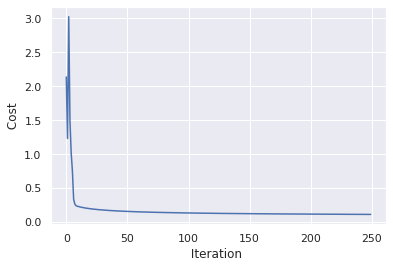

In [ ]:
#########################################################
#training
X_train = new_X_train.reshape(len(new_X_train),28*28)
X_train = X_train/255
w, b, l, weights = fit(X_train, new_train_label, alpha=0.9, cl=4, epochs=250, batch_size=5)


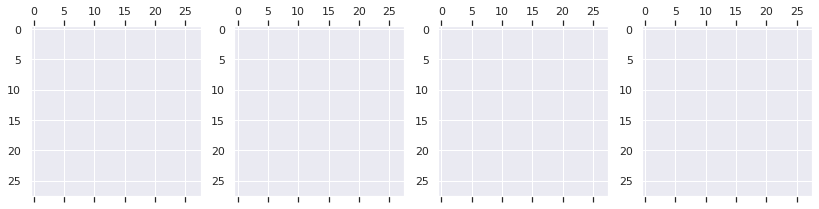

In [ ]:
# Plot weight
import matplotlib.pyplot as plt
from celluloid import Camera
from IPython.display import HTML # display animation
frames, (fig1, fig2, fig3, fig4) = plt.subplots(1,4, figsize=(14,14))
camera = Camera(frames)
vmin, vmax = w.min(), w.max()  # normalization w
for w in weights:
    fig1.matshow(w[:,0].T.reshape(28,28), cmap=plt.cm.RdBu, vmin=.5 * vmin, vmax=.5 * vmax)
    fig2.matshow(w[:,1].T.reshape(28,28), cmap=plt.cm.RdBu, vmin=.5 * vmin, vmax=.5 * vmax)
    fig3.matshow(w[:,2].T.reshape(28,28), cmap=plt.cm.RdBu, vmin=.5 * vmin, vmax=.5 * vmax)
    fig4.matshow(w[:,3].T.reshape(28,28), cmap=plt.cm.RdBu, vmin=.5 * vmin, vmax=.5 * vmax)
    camera.snap() # snapshot of the plot
video = camera.animate()
HTML(video.to_html5_video()) # showing video

In [ ]:
# Accuracy for test
# preprocessing Ttest dataset
X_test = new_test_input.reshape(len(new_test_input),28*28) #flatting
X_test = X_test/255  # Normalization

label1=np.where(new_test_y==dx1)[0]
label2=np.where(new_test_y==dx2)[0]
label3=np.where(new_test_y==dx3)[0]
label4=np.where(new_test_y==dx4)[0]
new_test_y[label1]=0
new_test_y[label2]=1
new_test_y[label3]=2
new_test_y[label4]=3

# Accuracy
train_preds = np.argmax(softmax(z = X_train@w + b), axis=1) #train prediction
print(np.sum(new_train_label==train_preds)/len(new_train_label))  #train accuracy
test_preds = np.argmax(softmax(z = X_test@w + b), axis=1) #test prediction
print(np.sum(new_test_y==test_preds)/len(new_test_y))  #test accuracy

0.9651440846269201
0.9677807165183938


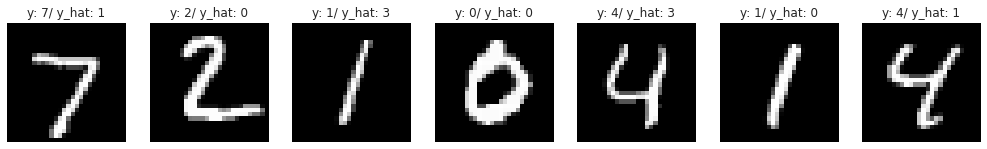

In [ ]:
#show the predeiction
fig = plt.figure(figsize=(20,20))
for i in range(7):
  ax = fig.add_subplot(5, 8, i+1)
  ax.imshow(test_X[i], cmap=plt.get_cmap('gray'))
  ax.set_title('y: {y}/ y_hat: {y_hat}'.format(y=test_y[i], y_hat=test_preds[i]))
  plt.axis('off')

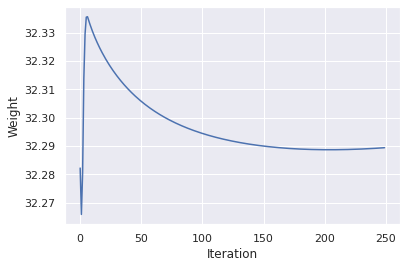

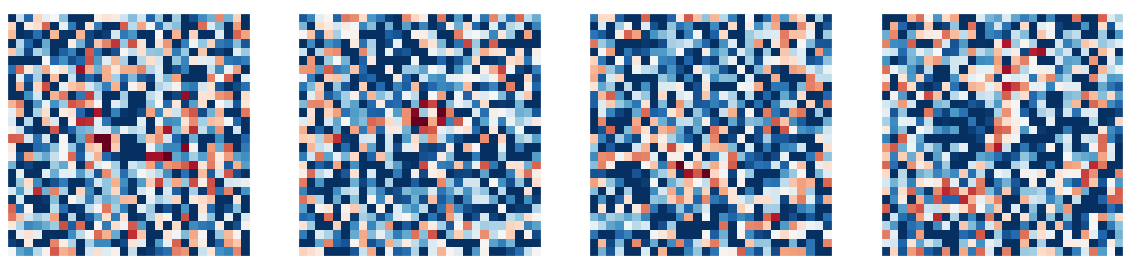

In [ ]:
#plot weights for 4 digits  versus iterations
i=0 #counter
n_prameters=np.ones(len(weights))
for parameter in weights:
  n_prameters[i]=np.sqrt(np.sum(np.power(parameter,2)))
  i=i+1
plt.plot(n_prameters)
plt.xlabel("Iteration")
plt.ylabel("Weight")
plt.show()

#plot final weight for 4 digits
fig, axes = plt.subplots(1,4, figsize=(20,20))
vmin, vmax = w.min(), w.max()
for coef, ax in zip(w.T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.RdBu,vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()